In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Helper Functions

In [2]:
def sigmoid(x):
    """
    Compute the sigmoid of x
    Arguments:
    x -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def relu(x):
    """
    Compute the relu of x
    Arguments:
    x -- A scalar or numpy array of any size.
    Return:
    s -- relu(x)
    """
    s = np.maximum(0,x)
    
    return s

def load_params_and_grads(seed=1):
    np.random.seed(seed)
    W1 = np.random.randn(2,3)
    b1 = np.random.randn(2,1)
    W2 = np.random.randn(3,3)
    b2 = np.random.randn(3,1)

    dW1 = np.random.randn(2,3)
    db1 = np.random.randn(2,1)
    dW2 = np.random.randn(3,3)
    db2 = np.random.randn(3,1)
    
    return W1, b1, W2, b2, dW1, db1, dW2, db2


def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    b1 -- bias vector of shape (layer_dims[l], 1)
                    Wl -- weight matrix of shape (layer_dims[l-1], layer_dims[l])
                    bl -- bias vector of shape (1, layer_dims[l])
                    
    Tips:
    - For example: the layer_dims for the "Planar Data classification model" would have been [2,2,1]. 
    This means W1's shape was (2,2), b1 was (1,2), W2 was (2,1) and b2 was (1,1). Now you have to generalize it!
    - In the for loop, use parameters['W' + str(l)] to access Wl, where l is the iterative integer.
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*  np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert parameters['W' + str(l)].shape[0] == layer_dims[l], layer_dims[l-1]
        assert parameters['W' + str(l)].shape[0] == layer_dims[l], 1
        
    return parameters


def compute_cost(a3, Y):
    
    """
    Implement the cost function
    
    Arguments:
    a3 -- post-activation, output of forward propagation
    Y -- "true" labels vector, same shape as a3
    
    Returns:
    cost - value of the cost function without dividing by number of training examples
    
    Note: 
    This is used with mini-batches, 
    so we'll first accumulate costs over an entire epoch 
    and then divide by the m training examples
    """
    
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    cost_total =  np.sum(logprobs)
    
    return cost_total

def forward_propagation(X, parameters):
    """
    Implements the forward propagation (and computes the loss) presented in Figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape ()
                    b1 -- bias vector of shape ()
                    W2 -- weight matrix of shape ()
                    b2 -- bias vector of shape ()
                    W3 -- weight matrix of shape ()
                    b3 -- bias vector of shape ()
    
    Returns:
    loss -- the loss function (vanilla logistic loss)
    """
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    
    return a3, cache

def backward_propagation(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat)
    cache -- cache output from forward_propagation()
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

def predict(X, y, parameters):
    """
    This function is used to predict the results of a  n-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    p = np.zeros((1,m), dtype = int)
    
    # Forward propagation
    a3, caches = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    # print results

    #print ("predictions: " + str(p[0,:]))
    #print ("true labels: " + str(y[0,:]))
    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    #print("Accuracy: "  + str(np.sum((p == y)/m)))
    
    return p

def load_2D_dataset():
    data = scipy.io.loadmat('datasets/data.mat')
    train_X = data['X'].T
    train_Y = data['y'].T
    test_X = data['Xval'].T
    test_Y = data['yval'].T

    plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, s=40, cmap=plt.cm.Spectral);
    
    return train_X, train_Y, test_X, test_Y

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()
    
def predict_dec(parameters, X):
    """
    Used for plotting decision boundary.
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (m, K)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Predict using forward propagation and a classification threshold of 0.5
    a3, cache = forward_propagation(X, parameters)
    predictions = (a3 > 0.5)
    return predictions

In [3]:
### SGD

In [4]:
def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    Update parameters using one step of gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters to be updated:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients to update each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    learning_rate -- the learning rate, scalar.
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads['dW' + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads['db' + str(l+1)]
        
    return parameters

In [5]:
### MINIBATCH with SGD

In [6]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, int(m/mini_batch_size)*mini_batch_size : ]
        mini_batch_Y = shuffled_Y[:, int(m/mini_batch_size)*mini_batch_size : ]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [7]:
### GD with Momentum

In [8]:
def initialize_velocity(parameters):
    """
    Initializes the velocity as a python dictionary with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    
    Returns:
    v -- python dictionary containing the current velocity.
                    v['dW' + str(l)] = velocity of dWl
                    v['db' + str(l)] = velocity of dbl
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    # Initialize velocity
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros((parameters["W" + str(l+1)].shape[0], parameters["W" + str(l+1)].shape[1]))
        v["db" + str(l+1)] = np.zeros((parameters["b" + str(l+1)].shape[0], parameters["b" + str(l+1)].shape[1]))
        
    return v

In [9]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Update parameters using Momentum
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- python dictionary containing the current velocity:
                    v['dW' + str(l)] = ...
                    v['db' + str(l)] = ...
    beta -- the momentum hyperparameter, scalar
    learning_rate -- the learning rate, scalar
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- python dictionary containing your updated velocities
    """

    L = len(parameters) // 2 # number of layers in the neural networks
    
    # Momentum update for each parameter
    for l in range(L):
        
        # compute velocities
        v["dW" + str(l+1)] = beta*v["dW" + str(l+1)] + (1 - beta)*grads['dW' + str(l+1)]
        v["db" + str(l+1)] = beta*v["db" + str(l+1)] + (1 - beta)*grads['db' + str(l+1)]
        # update parameters
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*v["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*v["db" + str(l+1)]
        
    return parameters, v

In [10]:
### GD with Adaptive Momentum (ADAM)

In [11]:
def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros((parameters["W" + str(l+1)].shape[0], parameters["W" + str(l+1)].shape[1]))
        v["db" + str(l+1)] = np.zeros((parameters["b" + str(l+1)].shape[0], parameters["b" + str(l+1)].shape[1]))
        s["dW" + str(l+1)] = np.zeros((parameters["W" + str(l+1)].shape[0], parameters["W" + str(l+1)].shape[1]))
        s["db" + str(l+1)] = np.zeros((parameters["b" + str(l+1)].shape[0], parameters["b" + str(l+1)].shape[1]))
    
    return v, s

In [12]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(L):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        v["dW" + str(l+1)] = beta1*v["dW" + str(l+1)] + (1 - beta1)*grads['dW' + str(l+1)]
        v["db" + str(l+1)] = beta1*v["db" + str(l+1)] + (1 - beta1)*grads['db' + str(l+1)]

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)]/(1 - beta1**t)
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)]/(1 - beta1**t)

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        s["dW" + str(l+1)] = beta2*s["dW" + str(l+1)] + (1 - beta2)*np.square(grads['dW' + str(l+1)])
        s["db" + str(l+1)] = beta2*s["db" + str(l+1)] + (1 - beta2)*np.square(grads['db' + str(l+1)])

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)]/(1 - beta2**t)
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)]/(1 - beta2**t)

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*v_corrected["dW" + str(l+1)]/(np.sqrt(s_corrected["dW" + str(l+1)])+epsilon)
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*v_corrected["db" + str(l+1)]/(np.sqrt(s_corrected["db" + str(l+1)])+epsilon)

    return parameters, v, s

In [13]:
### Model Fit

In [33]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 1000, print_cost = True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples
    print("\nThe number of training examples is : %i\n" %m)
    print("The mini-batch size : %i\n" %mini_batch_size)
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost and add to the cost total
            cost_total += compute_cost(a3, minibatch_Y)
            #print("\n OK OK \n")
            #print(minibatch_Y)
            #print("\n OK OK \n")

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        
        # Print the cost every 1000 epoch
        if print_cost and i % 25 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and i % 25 == 0:
            costs.append(cost_avg)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

# Loading Data

In [15]:
import zipfile
with zipfile.ZipFile("archive (5).zip", 'r') as zip_ref:
    zip_ref.extractall()

In [16]:
img_size = 64
batch_size= 32

train_datagen = ImageDataGenerator(rescale=1/255., validation_split = 0.05)

test_datagen = ImageDataGenerator(rescale=1/255.)


train_generator = train_datagen.flow_from_directory('PandasBears/Train',
                                                    target_size= (img_size, img_size),
                                                    batch_size = batch_size,
                                                    subset = 'training',
                                                    class_mode ='binary')

val_generator = train_datagen.flow_from_directory('PandasBears/Train',
                                                target_size= (img_size, img_size),
                                                batch_size = batch_size,
                                                subset = 'validation',
                                                class_mode ='binary')

test_generator = test_datagen.flow_from_directory('PandasBears/Test',
                                                target_size= (img_size, img_size),
                                                batch_size = batch_size,
                                                shuffle = False,
                                                class_mode ='binary')

Found 476 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [17]:
train_set_x_org = np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
train_set_y_org = np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])
test_set_x_org = np.concatenate([test_generator.next()[0] for i in range(test_generator.__len__())])
test_set_y_org = np.concatenate([test_generator.next()[1] for i in range(test_generator.__len__())])
classes = ['bear', 'panda']

In [18]:
train_set_x = train_set_x_org.reshape(train_set_x_org.shape[1]*train_set_x_org.shape[2]*train_set_x_org.shape[3], train_set_x_org.shape[0])
train_set_y = train_set_y_org.reshape(1, train_set_y_org.shape[0])
test_set_x = test_set_x_org.reshape(test_set_x_org.shape[1]*test_set_x_org.shape[2]*test_set_x_org.shape[3], test_set_x_org.shape[0])
test_set_y = test_set_y_org.reshape(1, test_set_y_org.shape[0])

In [19]:
train_set_x.shape

(12288, 476)

In [20]:
train_set_y.shape

(1, 476)

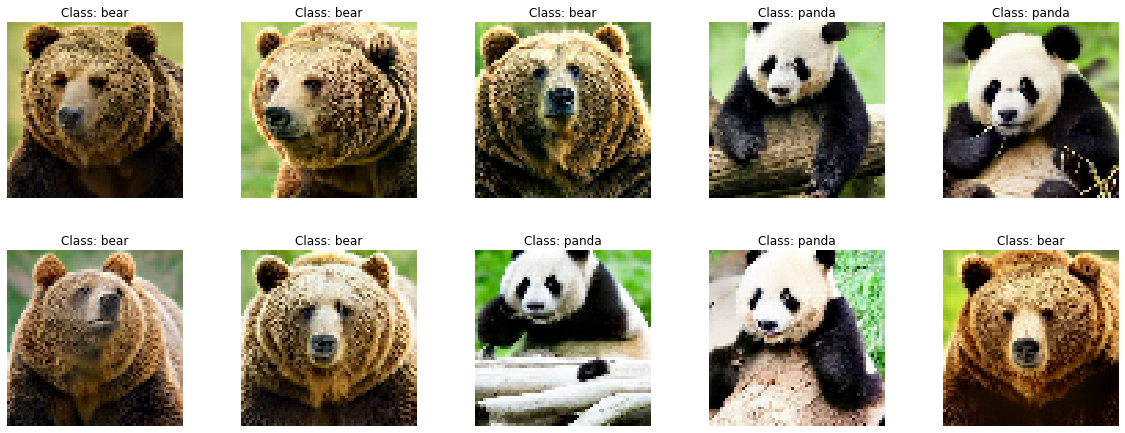

In [21]:
samples = train_generator.__next__()
images = samples[0]
target = samples[1]

plt.figure(figsize = (20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {classes[int(target[i])]}")
    plt.axis('off')

# Mini-batch Gradient descent


The number of training examples is : 476

The mini-batch size : 64

Cost after epoch 0: 0.697666
Cost after epoch 100: 0.563027
Cost after epoch 200: 0.492417
Cost after epoch 300: 0.356965
Cost after epoch 400: 0.242136


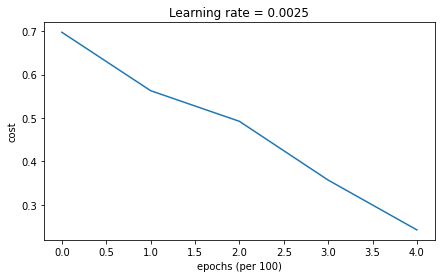

In [24]:
# train 3-layer model
layers_dims = [train_set_x.shape[0], 20, 15, 1]
parameters = model(train_set_x, train_set_y, layers_dims, optimizer = "gd", learning_rate = 0.0025, mini_batch_size = 64, num_epochs = 500)

In [25]:
# Predict Train
predictions = predict(train_set_x, train_set_y, parameters)

Accuracy: 0.9264705882352942


# Mini-batch gradient descent with momentum


The number of training examples is : 476

The mini-batch size : 32

Cost after epoch 0: 0.703351
Cost after epoch 100: 0.397225
Cost after epoch 200: 0.178065
Cost after epoch 300: 0.051648
Cost after epoch 400: 0.026937


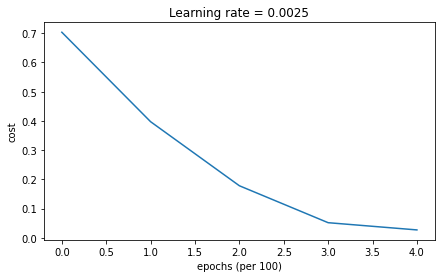

In [26]:
# train 3-layer model
layers_dims = [train_set_x.shape[0], 20, 15, 1]
parameters = model(train_set_x, train_set_y, layers_dims, optimizer = "momentum", learning_rate = 0.0025, mini_batch_size = 32, beta = 0.9, num_epochs = 500)

In [27]:
# Predict Train
predictions = predict(train_set_x, train_set_y, parameters)

Accuracy: 1.0


# Mini-batch with Adam mode


The number of training examples is : 476

The mini-batch size : 32

Cost after epoch 0: 1.907972
Cost after epoch 100: 0.051035
Cost after epoch 200: 0.000342


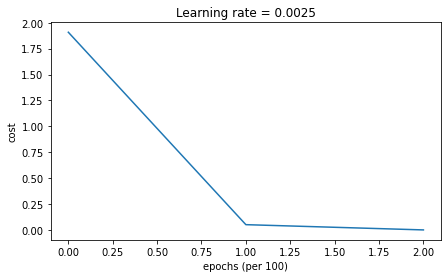

In [29]:
# train 3-layer model
layers_dims = [train_set_x.shape[0], 20, 15, 1]
parameters = model(train_set_x, train_set_y, layers_dims, optimizer = "adam", learning_rate = 0.0025, mini_batch_size = 32, beta1 = 0.95, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 300)

In [ ]:
# Predict Train
predictions = predict(train_set_x, train_set_y, parameters)

Accuracy: 1.0


## Trying out different values of hyperparameters beta1, beta2, learning rate and looking at the effect on cost

****************************************************
learning rate =  0.025
****************************************************
****************************************************
hyperparameters: beta1 =  0.9 , beta2 =  0.999
****************************************************

The number of training examples is : 476

The mini-batch size : 32

Cost after epoch 0: nan


<ipython-input-2-c07c939a2a1f>:89: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
<ipython-input-2-c07c939a2a1f>:89: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after epoch 25: 0.693361
Cost after epoch 50: 0.693460
Cost after epoch 75: 0.693240
Cost after epoch 100: 0.693395
Cost after epoch 125: 0.693769
Cost after epoch 150: 0.693437
Cost after epoch 175: 0.693747
Cost after epoch 200: 0.693690
Cost after epoch 225: 0.693377
Cost after epoch 250: 0.693688
Cost after epoch 275: 0.694091


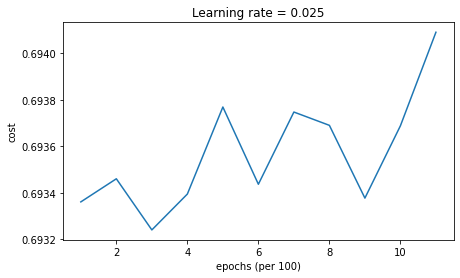

****************************************************
hyperparameters: beta1 =  0.95 , beta2 =  0.999
****************************************************

The number of training examples is : 476

The mini-batch size : 32

Cost after epoch 0: nan
Cost after epoch 25: 0.676127
Cost after epoch 50: 0.693284
Cost after epoch 75: 0.693189
Cost after epoch 100: 0.693224
Cost after epoch 125: 0.693368
Cost after epoch 150: 0.693288
Cost after epoch 175: 0.693520
Cost after epoch 200: 0.693420
Cost after epoch 225: 0.693334
Cost after epoch 250: 0.693544
Cost after epoch 275: 0.693810


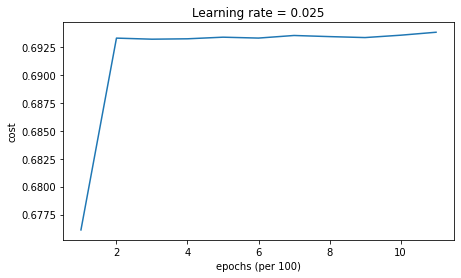

****************************************************
hyperparameters: beta1 =  0.98 , beta2 =  0.999
****************************************************

The number of training examples is : 476

The mini-batch size : 32

Cost after epoch 0: nan
Cost after epoch 25: 0.693184
Cost after epoch 50: 0.693215
Cost after epoch 75: 0.693165
Cost after epoch 100: 0.693181
Cost after epoch 125: 0.693225
Cost after epoch 150: 0.693187
Cost after epoch 175: 0.693441
Cost after epoch 200: 0.693290
Cost after epoch 225: 0.693297
Cost after epoch 250: 0.693385
Cost after epoch 275: 0.693466


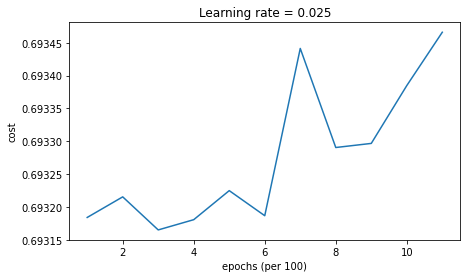

****************************************************
learning rate =  0.0025
****************************************************
****************************************************
hyperparameters: beta1 =  0.9 , beta2 =  0.999
****************************************************

The number of training examples is : 476

The mini-batch size : 32

Cost after epoch 0: 1.931014
Cost after epoch 25: 0.532631
Cost after epoch 50: 0.440345
Cost after epoch 75: 0.175569
Cost after epoch 100: 0.126230
Cost after epoch 125: 0.084720
Cost after epoch 150: 0.009141
Cost after epoch 175: 0.004859
Cost after epoch 200: 0.003234
Cost after epoch 225: 0.002380
Cost after epoch 250: 0.001513
Cost after epoch 275: 0.001011


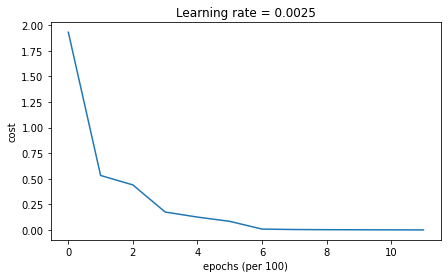

****************************************************
hyperparameters: beta1 =  0.95 , beta2 =  0.999
****************************************************

The number of training examples is : 476

The mini-batch size : 32

Cost after epoch 0: 1.907972
Cost after epoch 25: 0.462372
Cost after epoch 50: 0.311699
Cost after epoch 75: 0.172092
Cost after epoch 100: 0.051035
Cost after epoch 125: 0.031141
Cost after epoch 150: 0.006384
Cost after epoch 175: 0.000884
Cost after epoch 200: 0.000342
Cost after epoch 225: 0.000174
Cost after epoch 250: 0.000107
Cost after epoch 275: 0.000067


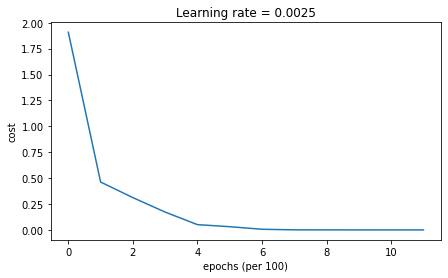

****************************************************
hyperparameters: beta1 =  0.98 , beta2 =  0.999
****************************************************

The number of training examples is : 476

The mini-batch size : 32

Cost after epoch 0: 1.891774
Cost after epoch 25: 0.485825
Cost after epoch 50: 0.394196
Cost after epoch 75: 0.133828
Cost after epoch 100: 0.053130
Cost after epoch 125: 0.053826
Cost after epoch 150: 0.009148
Cost after epoch 175: 0.004951
Cost after epoch 200: 0.003659
Cost after epoch 225: 0.002603
Cost after epoch 250: 0.002025
Cost after epoch 275: 0.001657


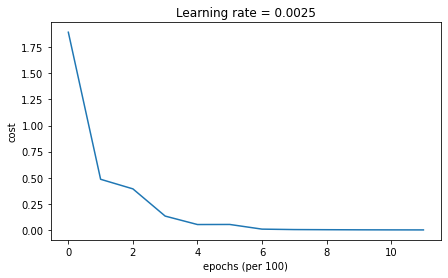

****************************************************
learning rate =  0.00025
****************************************************
****************************************************
hyperparameters: beta1 =  0.9 , beta2 =  0.999
****************************************************

The number of training examples is : 476

The mini-batch size : 32

Cost after epoch 0: 0.769013
Cost after epoch 25: 0.570156
Cost after epoch 50: 0.498382
Cost after epoch 75: 0.378002
Cost after epoch 100: 0.299868
Cost after epoch 125: 0.225104
Cost after epoch 150: 0.165589
Cost after epoch 175: 0.110193
Cost after epoch 200: 0.079516
Cost after epoch 225: 0.059176
Cost after epoch 250: 0.042498
Cost after epoch 275: 0.028579


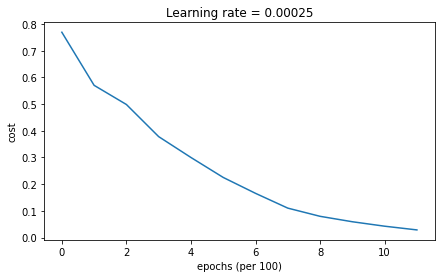

****************************************************
hyperparameters: beta1 =  0.95 , beta2 =  0.999
****************************************************

The number of training examples is : 476

The mini-batch size : 32

Cost after epoch 0: 0.790859
Cost after epoch 25: 0.591166
Cost after epoch 50: 0.472975
Cost after epoch 75: 0.362922
Cost after epoch 100: 0.270276
Cost after epoch 125: 0.190215
Cost after epoch 150: 0.142139
Cost after epoch 175: 0.094775
Cost after epoch 200: 0.075409
Cost after epoch 225: 0.048988
Cost after epoch 250: 0.050019
Cost after epoch 275: 0.024610


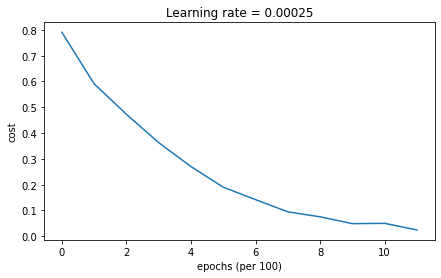

****************************************************
hyperparameters: beta1 =  0.98 , beta2 =  0.999
****************************************************

The number of training examples is : 476

The mini-batch size : 32

Cost after epoch 0: 0.792687
Cost after epoch 25: 0.579004
Cost after epoch 50: 0.492013
Cost after epoch 75: 0.423116
Cost after epoch 100: 0.362186
Cost after epoch 125: 0.284292
Cost after epoch 150: 0.254130
Cost after epoch 175: 0.189370
Cost after epoch 200: 0.154745
Cost after epoch 225: 0.132283
Cost after epoch 250: 0.100028
Cost after epoch 275: 0.077031


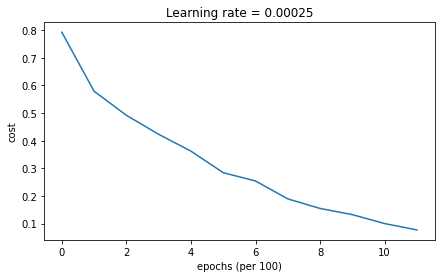

In [37]:
layers_dims = [train_set_x.shape[0], 20, 15, 1]
beta1 = [0.90, 0.95, 0.98]
beta2 = [0.999, 0.999, 0.999]
lrate = [0.025, 0.0025, 0.00025]

for l in range(len(lrate)):

  lr = lrate[l]

  print('****************************************************')
  print('learning rate = ', lr)
  print('****************************************************')

  for i in range(len(beta1)):

    bt1 = beta1[i]
    bt2 = beta2[i]

    print('****************************************************')
    print('hyperparameters: beta1 = ', bt1, ", beta2 = ", bt2)
    print('****************************************************')

    parameters_new = model(train_set_x, train_set_y, layers_dims, optimizer = "adam", learning_rate = lr, mini_batch_size = 32, beta1 = bt1, beta2 = bt2,  epsilon = 1e-8, num_epochs = 300)
